In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
import re
ex='[^a-zA-Z]'

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


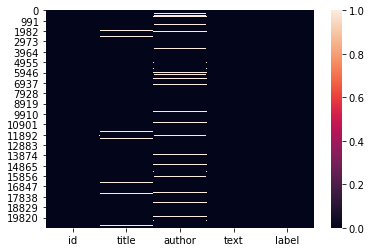

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.notnull().sum()

id        20800
title     20242
author    18843
text      20761
label     20800
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df=df.reset_index()

In [8]:
msg=df.copy()

In [9]:
data=[]
for i in range(len(msg)):
    rev=re.sub(ex,' ',msg['title'][i])
    rev=rev.lower()
    rev=rev.split()
    rev=[stemmer.stem(words) for words in rev if words not in stopwords.words('english')]
    rev=' '.join(rev)
    data.append(rev)

In [10]:
data[1]

'flynn hillari clinton big woman campu breitbart'

In [11]:
df['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'